Assume a process where

$\dot x = v_0 + a(x)b(t)$

If $x_b(0) = 0$ and $x_f(0) = d_0$, what $a(x)$ and $b(t)$ will decrease the distance $d(t) = x_f(t) - x_b(t)$ over time, yet without slowing down $x_b(t)$?

We consider the notion of periodic activation of a set of braking zones, where $b(t) = 1$ between $t_1

Where/when should we activate our braking zones such that the distance $d(t)$ between two propagating synfire waves that were originally offset by a position $d(0) = d_0$ decays over time?

Given $x_b(0) = 0$, $x_f(0) = d_0$, $v_0$ and $v_1$:

what are the optimal

$x_1^{z_1}, x_2^{z_1}, x_1^{z_2}, x_2^{z_2}, ...$

and 

$t_1^{z_1}, t_2^{z_1}, t_1^{z_2}, t_2^{z_2}, ...$?

Assuming periodic braking zones, we must find

$t_1^{z_1}, x_1^{z_1}, \Delta t, \Delta x, \Delta t^*, \Delta x^*$

(see diagram for definitions)

Given $x_f(0) = d_0$ we should place the start of the first braking zone $x_1^{z_1}$ at $d_0$ and start it immediately. Thus

$x_1^{z_1} = d_0$

$t_1^{z_1} = 0$.

Next, although we want to maximize the time $x_f$ is being slowed we do not want to slow $x_b$ at all, so we turn off the control when $x_b$ reaches $x_1^{z_1}$, i.e. at $d_0/{v_0}$. Thus

$t_2^{z_1} = \Delta t = d_0/{v_0}$.

Next, it only makes sense to have the zone extend to where $x_f$ will be at $t_2^{z_1}$ since otherwise the rest goes unused and in fact increases the time we have to wait to turn on the control again since we have to wait for $x_b$ to pass through it. Thus

$\Delta x = v_1\Delta t = v_1d_0/v_0$.

We must now wait for $x_b$ to pass through the zone before we can turn the control on again, or else $x_b$ will be slowed, which we want to avoid. This will happen at $t_2^{z_1} + \Delta x/v_0 = \Delta t + \Delta x/v_0$. Thus

$t_1^{z_2} = \Delta t + \Delta x/v_0$

so

$\Delta t^* = t_1^{z_2} - t_1^{z_1} = \Delta t + \Delta x/v_0 = d_0/{v_0} + v_1d_0/v_0^2 = (d_0/v_0)(1 + v_1/v_0)$.

To decide where the second zone should start we will assume for robustness that the first zone failed to slow down $x_f$. Thus $x_1^{z_2}$ should be where we expect $x_f$ to be at $\Delta t^*$ with no slowing, which is just 

$x_1^{z_2} = d_0 + v_0\Delta t^*$

$\Delta x^* = x_1^{z_2} - x_1^{z_1} = v_0\Delta t^* = d_0(1 + v_1/v_0)$

# Simulations

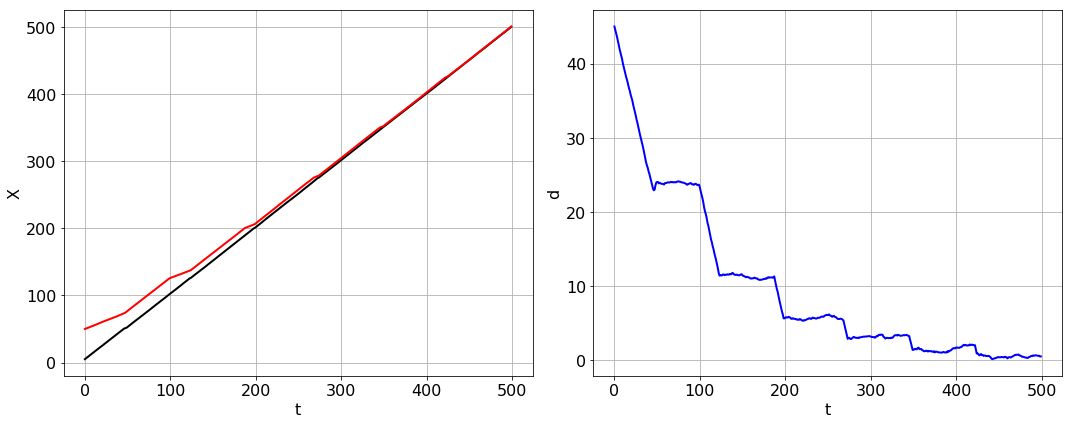

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from disp import set_font_size

np.random.seed(1000)


DT = 1.

D_0 = 50.
V_0 = 1.
V_1 = .5
DEL_V = V_0 - V_1

T_1_1 = 0
X_1_1 = D_0
DEL_T = D_0/V_0
DEL_X = D_0*V_1/V_0 - 1
DEL_T_S = (D_0/V_0) * (1 + V_1/V_0)
DEL_X_S = D_0 * (1 + V_1/V_0)

D = 500
X_MAX = V_0 * D

T_1 = np.arange(T_1_1, D, DEL_T_S)
T_2 = T_1 + DEL_T

X_1 = np.arange(X_1_1, X_MAX, DEL_X_S)
X_2 = X_1 + DEL_X


def a(x):
    for x_1, x_2 in zip(X_1, X_2):
        if x_1 <= x < x_2:
            return -DEL_V
    return 0

def b(t):
    for t_1, t_2 in zip(T_1, T_2):
        if t_1 <= t < t_2:
            return 1
    return 0

t = np.arange(0, D, DT)

x_b = np.nan * np.zeros(len(t))
x_b[0] = D_0/10

x_f = np.nan * np.zeros(len(t))
x_f[0] = D_0


for ct, t_ in enumerate(t[1:], 1):
    dx_b_dt = V_0 + a(x_b[ct-1])*b(t_) + np.random.normal(0, .05)
    x_b[ct] = x_b[ct-1] + dx_b_dt
    
    dx_f_dt = V_0 + a(x_f[ct-1])*b(t_) + np.random.normal(0, .05)
    x_f[ct] = x_f[ct-1] + dx_f_dt
    

fig, axs = plt.subplots(1, 2, figsize=(15, 6), tight_layout=True)
axs[0].plot(t, x_b, c='k', lw=2)
axs[0].plot(t, x_f, c='r', lw=2)
axs[0].set_xlabel('t')
axs[0].set_ylabel('X')

axs[1].plot(t, x_f-x_b, c='b', lw=2)
axs[1].set_xlabel('t')
axs[1].set_ylabel('d')

for ax in axs:
    ax.grid()
    set_font_size(ax, 16)